<img src=assets/UBA_header.png>

# **Universidad de Buenos Aires**

### Carrera de Especialización en Inteligencia Artificial
<br>

## **Proyecto final - Aprendizaje de Máquina**

### Cohorte 22 - Año 2025

## Autores
- [SIU a2208] Ariel Matias Cabello <arielmcabello@gmail.com>
- [SIU a2213] Ignacio Agustin Costarelli <agustin@costarellisa.com.ar>
- [SIU a2214] Alex Martín Curellich <alexcurellich@gmail.com>
<br>
<br>
Este repositorio contiene el material de resolución del Trabajo práctico integrador correspondiente correspondiente a la asignatura de aprendizaje de maquinas. <br>

# Imports y config iniciales

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import seaborn as sns
from scipy import stats

# Ingesta del dataset

In [5]:
# Read dataset
path = pathlib.Path("dataset/one_million_mushrooms.csv")
df = pd.read_csv(path, delimiter=';')

# 1. Analisis exploratorio de datos

Antes de abordar cualquier modelo de aprendizaje automático, resulta fundamental realizar un análisis exploratorio de los datos (EDA). Este proceso nos permite comprender la estructura del conjunto de datos, detectar posibles inconsistencias o valores faltantes, identificar relaciones entre variables y, en general, obtener una primera impresión de la información disponible. En tal sentido se llevó a cabo un análisis etructurado según las siguientes etapas:

- Revisión general del dataset.
- Distribución de variables numéricas.
- Distribución de variables categóricas.
- Análisis de valores faltantes.
- Identificación de outliers y posibles inconsistencias.
- Análisis de correlaciones y relaciones entre variables

### 1.1. Revisión general del dataset: 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038000 entries, 0 to 1037999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   class                 1038000 non-null  object 
 1   cap-diameter          1038000 non-null  float64
 2   cap-shape             1038000 non-null  object 
 3   cap-surface           798000 non-null   object 
 4   cap-color             1038000 non-null  object 
 5   does-bruise-or-bleed  1038000 non-null  object 
 6   gill-attachment       870000 non-null   object 
 7   gill-spacing          612000 non-null   object 
 8   gill-color            1038000 non-null  object 
 9   stem-height           1038000 non-null  float64
 10  stem-width            1038000 non-null  float64
 11  stem-root             162000 non-null   object 
 12  stem-surface          390000 non-null   object 
 13  stem-color            1038000 non-null  object 
 14  veil-type             54000 non-nu

Como se puede observar en la información precedente, el dataset contiene 1.038.000 registros y 21 columnas, de las cuales 18 son categóricas y 3 numéricas (cap-diameter, stem-height y stem-width).
La variable objetivo (class) indica si el hongo es comestible (e) o venenoso (p), tratándose entonces de un problema de clasificación binaria.
La inspección con df.info() permitió confirmar que varias columnas presentan valores faltantes en diferentes proporciones. Esto nos sugiere la necesidad de decidir a futuro entre imputar, eliminar o transformar esas variables según su relevancia en el modelado.

### 1.2. Distribución de variables numéricas: 

In [14]:
df. describe()

,cap_diameter,stem_height,stem_width
count,1.038000e+06,1.038000e+06,1.038000e+06
mean,6.737280e+00,6.588308e+00,1.215534e+01
std,5.249366e+00,3.375367e+00,1.001048e+01
min,3.000000e-01,0.000000e+00,-2.750000e+00
25%,3.500000e+00,4.640000e+00,5.210000e+00
50%,5.880000e+00,5.960000e+00,1.018000e+01
75%,8.540000e+00,7.750000e+00,1.660000e+01
max,6.656000e+01,3.615000e+01,1.055000e+02


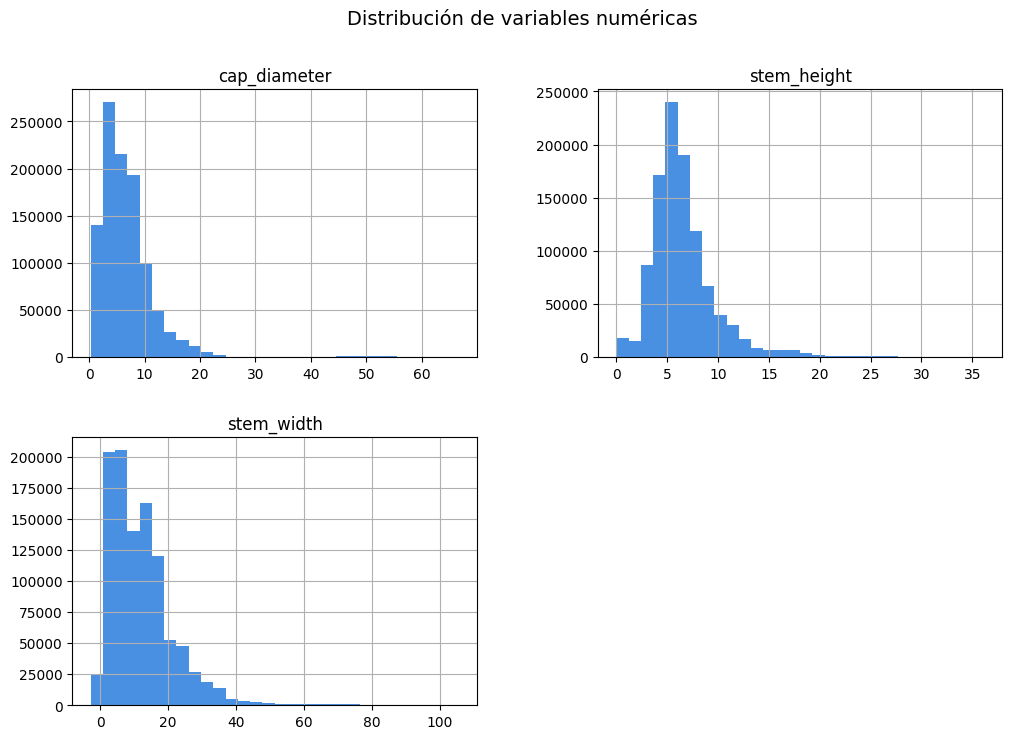

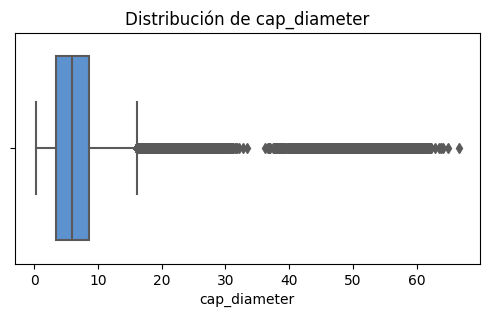

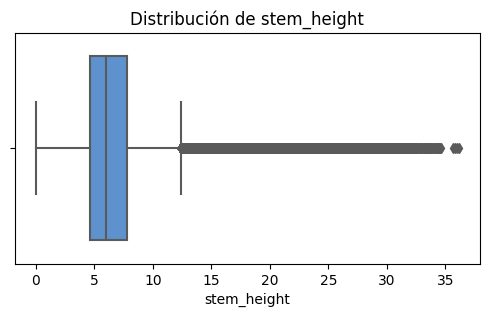

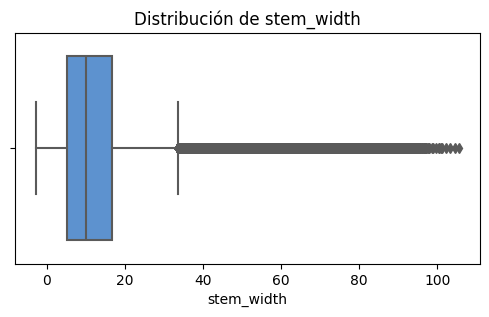

In [13]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

df[numeric_cols].hist(bins=30, figsize=(12,8), color='#4a90e2')
plt.suptitle('Distribución de variables numéricas', fontsize=14)
plt.show()

for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col], color='#4a90e2')
    plt.title(f'Distribución de {col}')
    plt.show()


Como pudimos observar, el análisis numérico mostró que:

- Los valores de cap-diameter, stem-height y stem-width varían ampliamente.

- Se detectaron valores atípicos potenciales, como stem-width negativo o stem-height igual a cero, lo que podría indicar errores de medición o registro.

### 1.3. Distribución de variables categóricas

In [24]:
df.describe(include=['object'])

,class,cap_shape,cap_surface,cap_color,does_bruise_or_bleed,gill_attachment,gill_spacing,gill_color,stem_root,stem_surface,stem_color,veil_type,veil_color,has_ring,ring_type,spore_print_color,habitat,season
count,1038000,1038000,798000,1038000,1038000,870000,612000,1038000,162000,390000,1038000,54000,126000,1038000,996000,108000,1038000,1038000
unique,2,7,11,12,2,7,3,12,5,8,13,1,6,2,8,7,8,4
top,p,x,t,n,f,a,c,w,b,s,w,u,w,f,f,k,d,a
freq,576000,457326,138461,415920,858000,216055,420000,314585,54000,101929,389907,54000,92989,780000,822000,36003,751259,514753


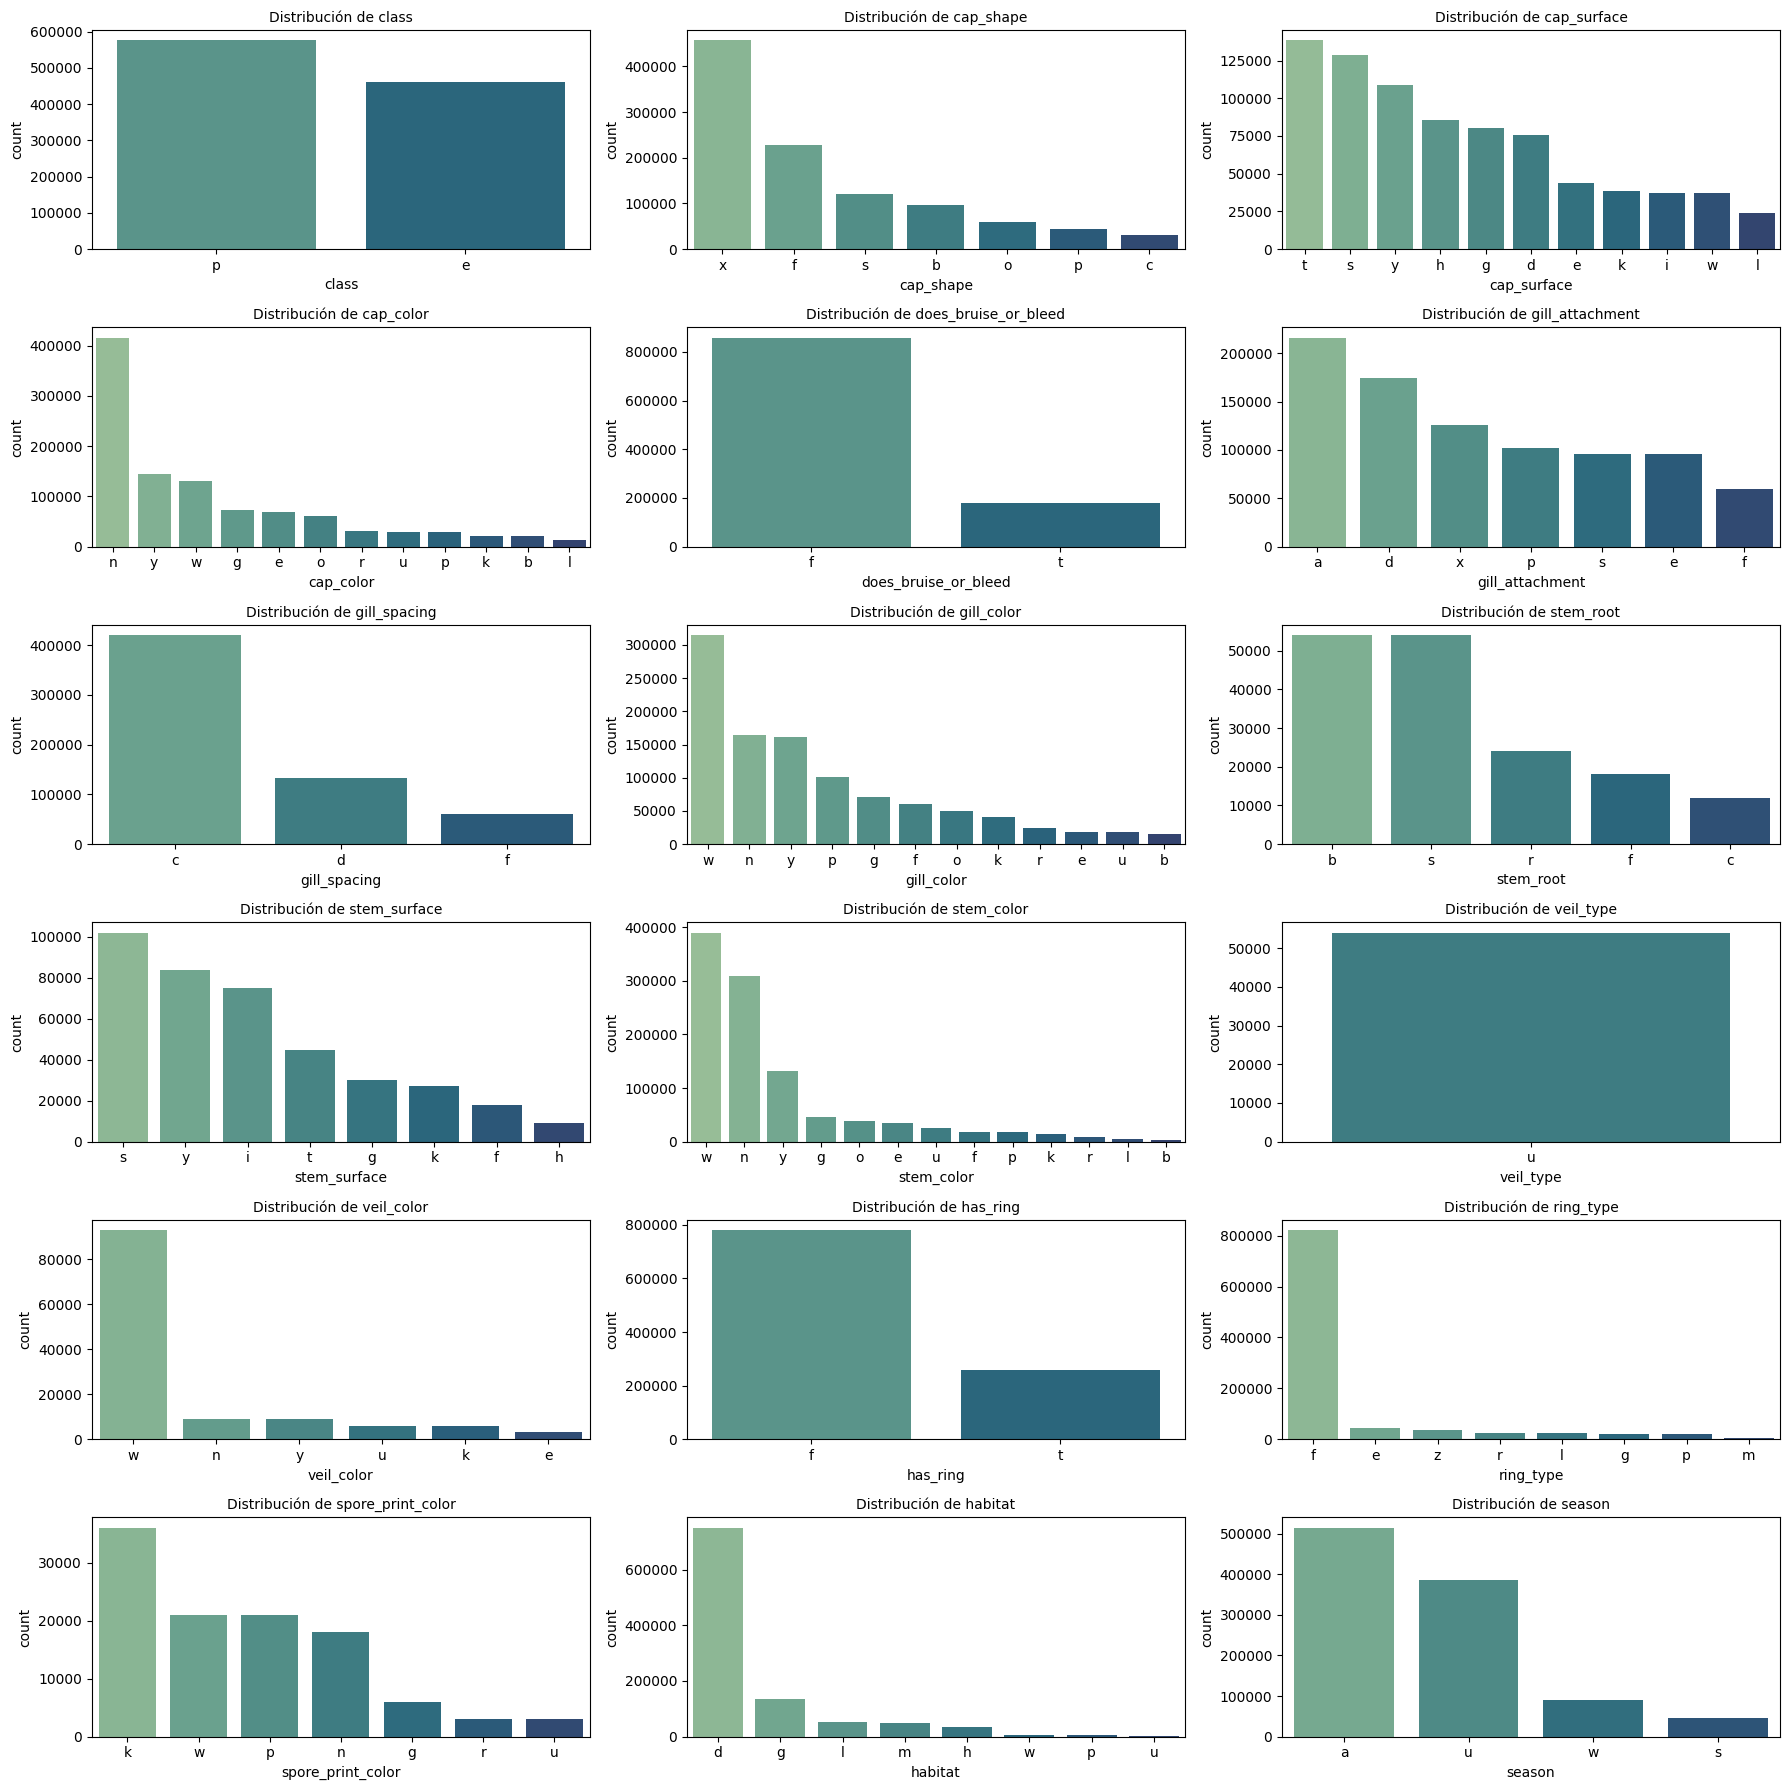

In [25]:

categorical_cols = df.select_dtypes(include=['object']).columns

fig, axes = plt.subplots(6, 3, figsize=(18, 18))
axes = axes.flatten() 


for i, col in enumerate(categorical_cols[:18]): 
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='crest', ax=axes[i])
    axes[i].set_title(f'Distribución de {col}', fontsize=10)
    axes[i].tick_params(axis='x', rotation=0)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Las estadísticas de las variables categóricas mostraron:
- Varios atributos con alta cardinalidad (por ejemplo, cap-color con 12 categorías y stem-color con 13).

- La variable veil-type tiene una sola categoría (“u”), lo que indica que no aporta información, por lo tanto, podría eliminarse del análisis.

- La distribución de la clase (class) está levemente desbalanceada, con 57,6% de hongos venenosos y 42,4% comestibles, algo a tener en cuenta en la etapa de modelado.

### 1.4. Análisis de valores faltantes

                      Valores Faltantes  Porcentaje (%)
veil_type                        984000       94.797688
spore_print_color                930000       89.595376
veil_color                       912000       87.861272
stem_root                        876000       84.393064
stem_surface                     648000       62.427746
gill_spacing                     426000       41.040462
cap_surface                      240000       23.121387
gill_attachment                  168000       16.184971
ring_type                         42000        4.046243
cap_color                             0        0.000000
cap_shape                             0        0.000000
cap_diameter                          0        0.000000
class                                 0        0.000000
stem_height                           0        0.000000
stem_width                            0        0.000000
does_bruise_or_bleed                  0        0.000000
gill_color                            0        0

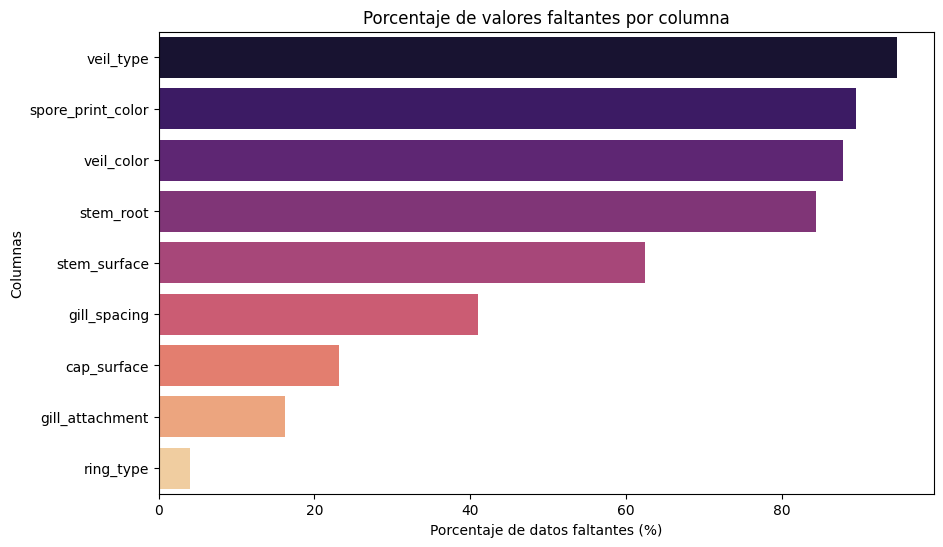

In [20]:
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Valores Faltantes': missing, 'Porcentaje (%)': missing_percent})

print(missing_df)

plt.figure(figsize=(10,6))
sns.barplot(x=missing_percent[missing_percent > 0], 
            y=missing_percent[missing_percent > 0].index, 
            palette='magma')
plt.title('Porcentaje de valores faltantes por columna')
plt.xlabel('Porcentaje de datos faltantes (%)')
plt.ylabel('Columnas')
plt.show()

Al examinar la cantidad y el porcentaje de valores faltantes por columna, se observó que el dataset presenta niveles significativos de ausencia de datos en varias variables. En particular:

- *veil_type* tiene un 94,8 % de valores faltantes.

- *spore_print_color, veil_color* y *stem_root* también presentan más del 80 % de datos ausentes.

- Otras variables como *stem_surface* (62,4 %), *gill_spacing* (41 %) y *cap_surface* (23 %) muestran una cantidad intermedia de faltantes, mientras que el resto posee datos completos.

Estas proporciones indican que ciertas columnas aportan muy poca información útil o su imputación podría introducir un sesgo considerable. En particular, *veil_type*, con casi todos los valores nulos, probablemente deba ser eliminada del conjunto de datos, ya que no ofrece variabilidad ni información relevante. Para los casos intermedios, como cap-surface o gill-spacing, podríamos evaluar la imputación mediante otro parámetro como la moda o la media.
Por lo expresado anteriormente, concluímos que el dataset requiere un proceso de limpieza, priorizando la eliminación o imputación de variables con altos porcentajes de faltantes antes de continuar con la etapa de preprocesamiento. 

### 1.5. Identificación de outliers y posibles inconsistencias
Para este análisis se utilizó el método del rango intercuartílico (IQR). La elección de este método la justificamos en lo siguiente:
- No depende de la distribución (no asume normalidad). Esto es importante ya que, como se puede observar en los gráficos de *2. Distribución de variables numéricas*, dichas variables justamente no siguen una distribución normal.
- Es robusto frente a valores extremos. Los cuartiles no se ven afectados significativamente por pocos valores atípicos.

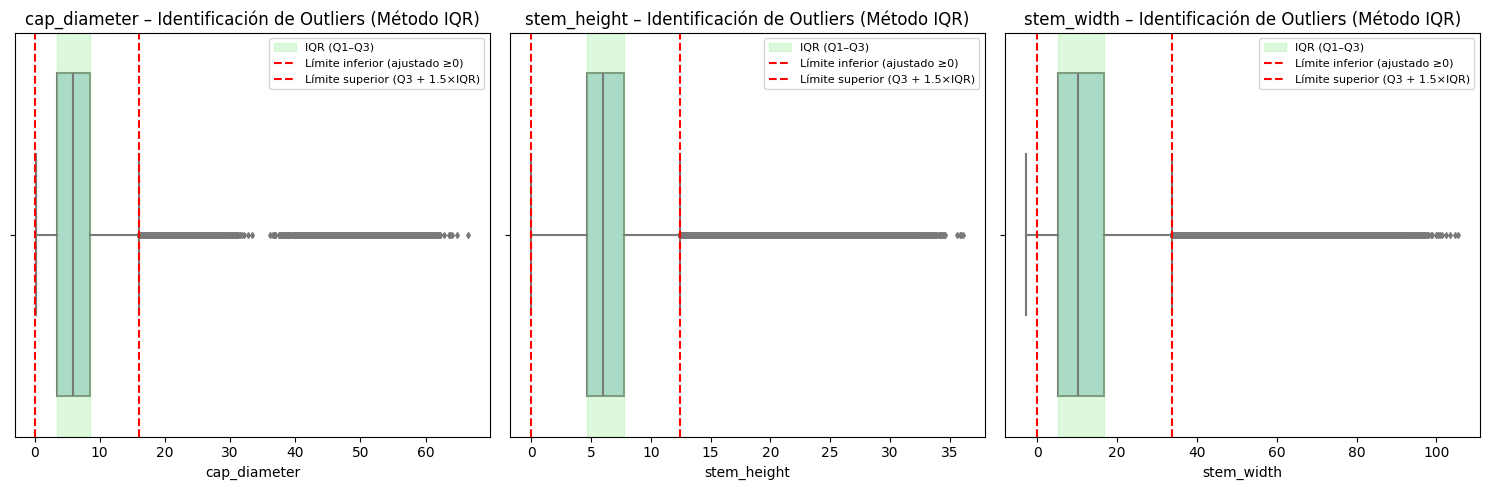

In [ ]:
variables = ['cap_diameter', 'stem_height', 'stem_width']

plt.figure(figsize=(15, 5))

for i, var in enumerate(variables, 1):
    plt.subplot(1, 3, i)
    
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = max(Q1 - 1.5 * IQR, 0)  # el límite inferior lo recortamos en 0 para evidenciar valores atípicos
    upper_limit = Q3 + 1.5 * IQR

    sns.boxplot(x=df[var], color="lightblue", fliersize=3)
    
    plt.axvspan(Q1, Q3, color="lightgreen", alpha=0.3, label="IQR (Q1–Q3)")
    
    plt.axvline(lower_limit, color="red", linestyle="--", label="Límite inferior (ajustado ≥0)")
    plt.axvline(upper_limit, color="red", linestyle="--", label="Límite superior (Q3 + 1.5×IQR)")

    plt.title(f"{var} – Identificación de Outliers (Método IQR)")
    plt.xlabel(var)
    plt.legend(loc="upper right", fontsize=8)

plt.tight_layout()
plt.show()


Los resultados indicaron que los outliers representan menos del 3% del total de observaciones, por lo que se consideró un nivel aceptable para continuar con el análisis sin comprometer la representatividad de los datos.

### 1.6. Análisis de correlaciones y relaciones entre variables

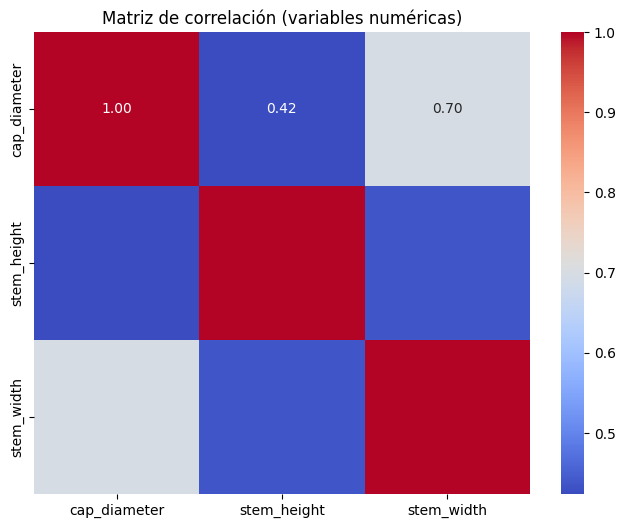

ValueError: Could not interpret input 'cap-diameter'

In [34]:
# Correlaciones numéricas
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación (variables numéricas)')
plt.show()

# Relación entre una variable numérica y la clase
sns.boxplot(data=df, x='class', y='cap-diameter', palette='Set2')
plt.title('Distribución de cap-diameter según clase')
plt.show()

# Relación entre variables categóricas y la clase
for col in categorical_cols[:4]:
    plt.figure(figsize=(6,3))
    sns.countplot(data=df, x=col, hue='class', order=df[col].value_counts().index)
    plt.title(f'{col} vs Clase')
    plt.xticks(rotation=45)
    plt.show()


### Tabla de resumen del dataset

| Columna               | Tipo    | Descripción general                                                                              | Valores posibles                                                                                                                                            |
|------------------------|---------|---------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------|
| class                  | categ. | Clase del hongo según su toxicidad                                                                | e = comestible, p = venenoso                                                                                                                                |
| cap-diameter (cm)      | num.   | Diámetro del sombrero (píleo)                                                                      | número flotante en cm                                                                                                                                       |
| cap-shape              | categ. | Forma del sombrero                                                                                | b = campana, c = cónica, x = convexa, f = plana, s = hundida, p = esférica, o = otras                                                                        |
| cap-surface            | categ. | Textura de la superficie del sombrero                                                             | i = fibrosa, g = con surcos, y = escamosa, s = lisa, h = brillante, l = coriácea, k = sedosa, t = pegajosa, w = arrugada, e = carnosa                        |
| cap-color              | categ. | Color del sombrero                                                                               | n = marrón, b = beige, g = gris, r = verde, p = rosa, u = púrpura, e = rojo, w = blanco, y = amarillo, l = azul, o = naranja, k = negro                        |
| does-bruise-bleed      | categ. | Indica si presenta moretones o sangrado al cortarse                                              | t = sí, f = no                                                                                                                                              |
| gill-attachment        | categ. | Forma en que las laminillas se unen al tallo                                                     | a = adnada, x = adnexada, d = decurrente, e = libre, s = sinuada, p = poros, f = ninguna, ? = desconocido                                                   |
| gill-spacing           | categ. | Separación entre las laminillas                                                                 | c = cerrada, d = distante, f = ninguna                                                                                                                     |
| gill-color             | categ. | Color de las laminillas                                                                          | igual a cap-color + f = ninguna                                                                                                                            |
| stem-height (cm)       | num.   | Altura del tallo                                                                                | número flotante en cm                                                                                                                                       |
| stem-width (mm)        | num.   | Grosor del tallo                                                                                | número flotante en mm                                                                                                                                       |
| stem-root              | categ. | Forma de la base del tallo                                                                      | b = bulbosa, s = hinchada, c = en maza, u = copa, e = igual, z = rizomorfa, r = enraizada                                                                   |
| stem-surface           | categ. | Textura de la superficie del tallo                                                              | igual a cap-surface + f = ninguna                                                                                                                          |
| stem-color             | categ. | Color del tallo                                                                                | igual a cap-color + f = ninguno                                                                                                                            |
| veil-type              | categ. | Tipo de velo                                                                                   | p = parcial, u = universal                                                                                                                                  |
| veil-color             | categ. | Color del velo                                                                                 | igual a cap-color + f = ninguno                                                                                                                            |
| has-ring               | categ. | Indica si el tallo tiene anillo                                                                | t = sí, f = no                                                                                                                                              |
| ring-type              | categ. | Tipo de anillo                                                                                 | c = telaraña, e = evanescente, r = abierto, g = surcado, l = grande, p = colgante, s = envolvente, z = zona, y = escamoso, m = móvil, f = ninguno, ? = desconocido |
| spore-print-color      | categ. | Color de la impresión de esporas                                                                | igual a cap-color                                                                                                                                          |
| habitat                | categ. | Hábitat donde crece                                                                            | g = pastos, l = hojas, m = praderas, p = senderos, h = brezales, u = urbano, w = desechos, d = bosques                                                      |
| season                 | categ. | Estación en que aparece                                                                        | s = primavera, u = verano, a = otoño, w = invierno                                                                                       